# 8. Нейронной сети 2

In [2]:
import torch

In [3]:
from setup_libs import *

In [121]:
from torch.nn import Sequential, Linear, LogSoftmax, Sigmoid, Flatten, Softmax, ReLU

# 8.1 Задача бинарной классификации

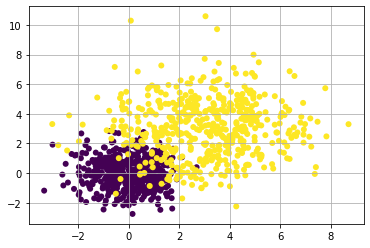

In [60]:
# Generate some data
# Generate some data
X, y = get_clf_dataset(500)

Y = np.vstack([y, 1-y]).T #обратите внимание что двумерный
plt.scatter(X[:,0],X[:,1], c = Y[:,0], edgecolors= 'none')
plt.grid()

In [37]:
t_X = torch.FloatTensor(X)
t_y = torch.FloatTensor(Y[:,0]).unsqueeze(-1)

## Sigmoid and BCELoss (Binary Cross Entropy)
* [BCELoss](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)
* [Sigmoid](https://pytorch.org/docs/stable/generated/torch.sigmoid.html)

In [65]:
model = Sequential(
    Linear(2, 5), # старая добрая линейка
    Linear(5,1),
    Sigmoid() # сигмоида
)

# Обозначили лосс
criterion = torch.nn.BCELoss()

# Выбоали алгоритм оптимизации
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

# Спуск
for t in range(2000):
    y_pred = model(t_X)
    loss = criterion(y_pred, t_y)
    
    if t % 100 == 99:
        print(t, loss.item())
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



99 0.7314732670783997
199 0.722579836845398
299 0.7138548493385315
399 0.7052885293960571
499 0.6968715786933899
599 0.688595712184906
699 0.6804527640342712
799 0.6724354028701782
899 0.6645364761352539
999 0.6567499041557312
1099 0.6490697860717773
1199 0.6414905786514282
1299 0.6340076923370361
1399 0.6266162395477295
1499 0.6193119883537292
1599 0.6120913028717041
1699 0.6049505472183228
1799 0.5978868007659912
1899 0.590896725654602
1999 0.5839780569076538


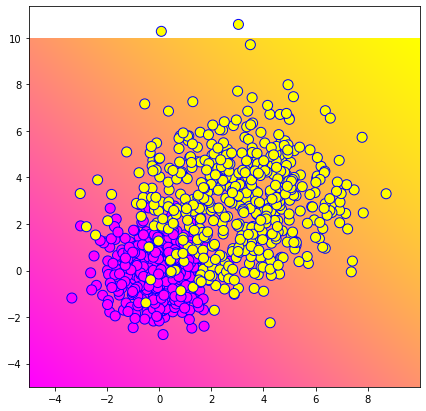

In [67]:
xx, yy = np.meshgrid(np.arange(-5, 10, .01), np.arange(-5, 10,.01))
input_field = np.c_[xx.ravel(), yy.ravel()]

predicted = model(torch.FloatTensor(input_field)).data.reshape(xx.shape)

# Отрисовка плоскости
plt.figure(figsize=(7, 7))
ax = plt.gca()
ax.pcolormesh(xx, yy, predicted, cmap='spring')

ax.scatter(X[:, 0], X[:, 1], c=Y[:,0], s=100, cmap='spring', edgecolors='b')

## Производная активации

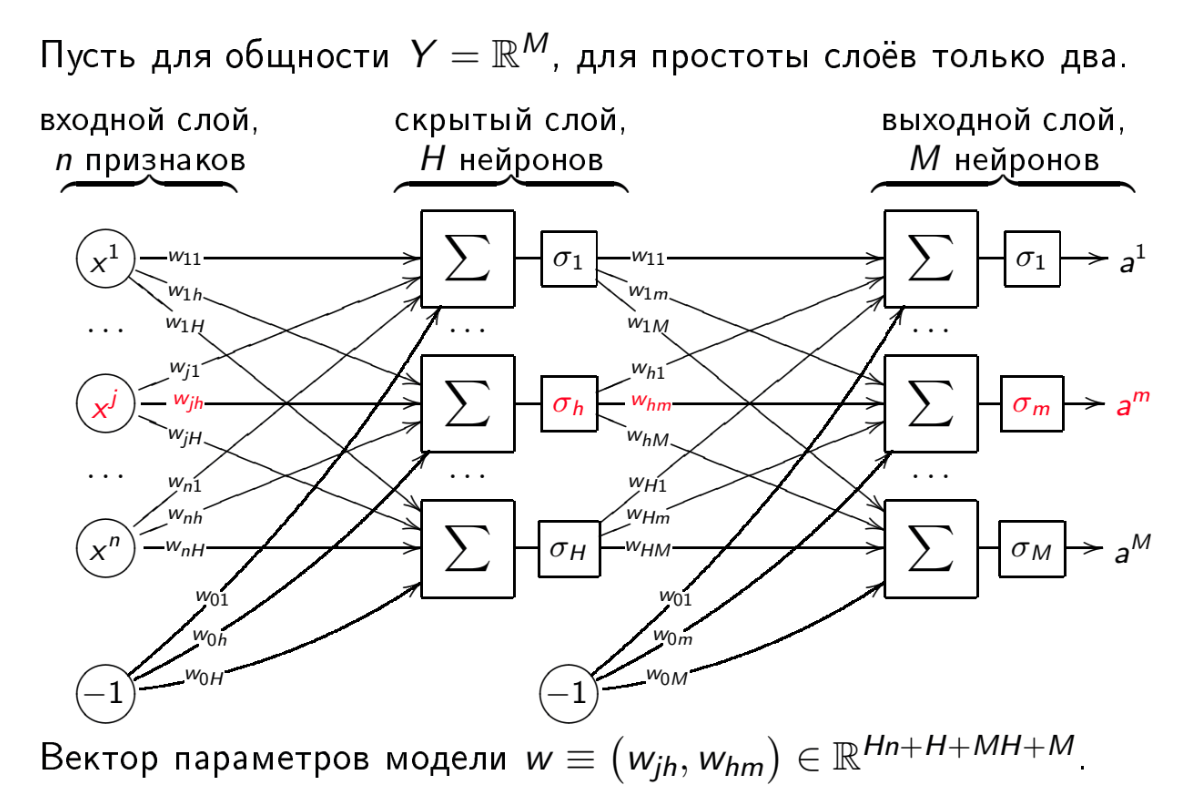

In [179]:
Image('images/2layers.png', width = 400)

$$\frac{\partial L}{\partial u} = \frac{\partial L}{\partial \sigma(u)}\frac{\partial \sigma(u)}{\partial u} = \varepsilon \sigma^{'}$$

$$\sigma = \frac{1}{1 + e^{-x}}$$

# 8.2 Многоклассовая классификация

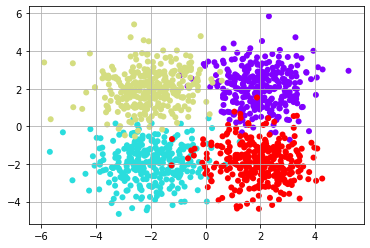

In [145]:
# Generate some data
N = 300

X1 = np.random.randn(N,2) + np.array([2,2])
X2 = np.random.randn(N,2) + np.array([-2,-2])
X3 = np.random.randn(N,2) + np.array([-2,2])
X4 = np.random.randn(N,2) + np.array([2,-2])

labels = np.concatenate([np.zeros(N),np.ones(N), 2 * np.ones(N), 3 * np.ones(N)]).astype(np.int64)

X = np.vstack([X1,X2,X3,X4])
plt.scatter(X[:,0],X[:,1], c = labels, cmap='rainbow', edgecolors= 'none')
plt.grid()

## CrossEntropy and SoftMax (NLLLoss + LogSoftMax)

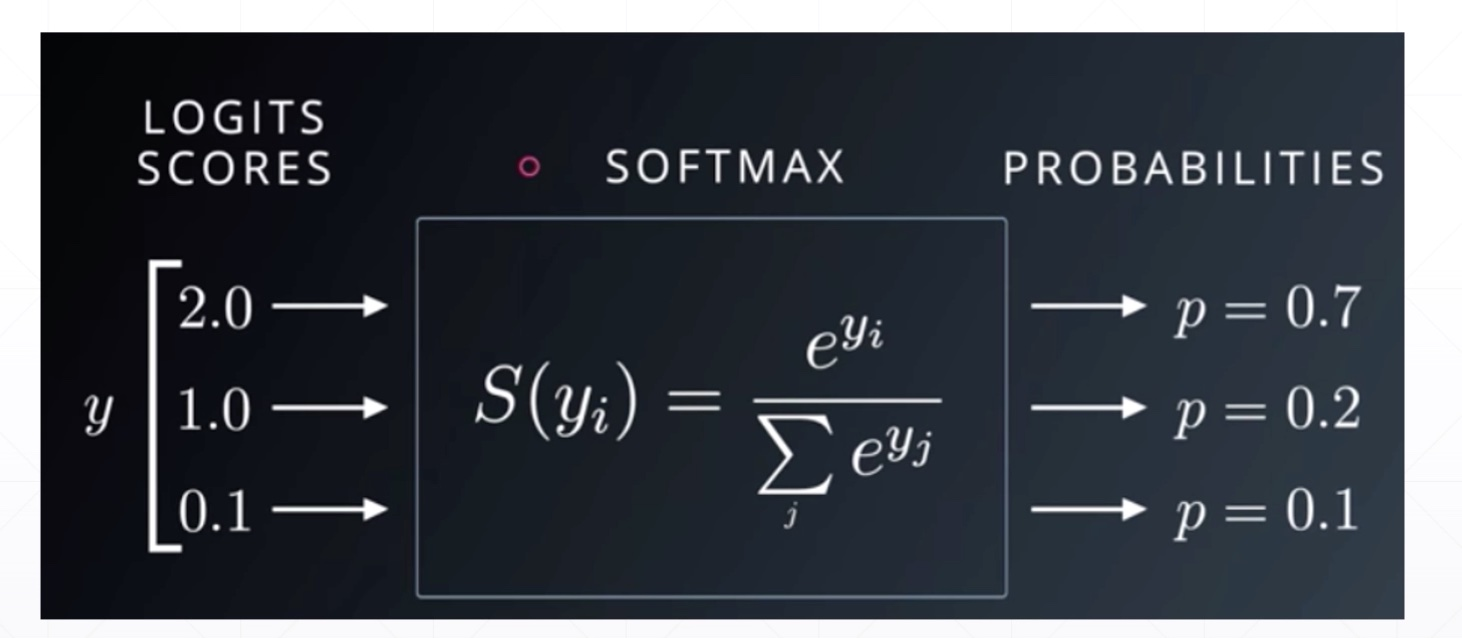

In [7]:
Image('images/softmax2.jpg', width=500)

$$ p_i = SoftMax(y_i) = \frac{e^{y_i}}{\sum_{i=j}e^{y_j}}$$

In [176]:
Softmax()(torch.tensor([1,2,3], dtype=float))

tensor([0.0900, 0.2447, 0.6652], dtype=torch.float64)

$$CrossEntropy = -\sum_{i=1}^{N}y_i^{real} log(p_i) \to min$$

[CrossEntropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)

$$torchCrossEntropy = -\sum_{i=1}^{N}y_i^{real} log\Big(\frac{e^{y_i}}{\sum_{i=j}e^{y_j}}\Big) \to min$$

In [180]:
t_X = torch.FloatTensor(X)
t_y = torch.LongTensor(labels) # индексы

In [184]:
model = Sequential(
    Linear(2, 4),
)

# Обозначили лосс
criterion = torch.nn.CrossEntropyLoss()

# Выбоали алгоритм оптимизации
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

# Спуск
for t in range(1000):
    # Нашли результат на текущей сети
    y_pred = model(t_X)
    # Посчитали ошибку
    loss = criterion(y_pred, t_y)
    if t % 100 == 99:
        print(t, loss.item())
    
    #Обнулили градиенты
    optimizer.zero_grad()

    # Посчитали градиенты
    loss.backward()

    # Пересчитываем веса
    optimizer.step()



99 1.0471497774124146
199 0.8530071973800659
299 0.8303433060646057
399 0.8201437592506409
499 0.8141148090362549
599 0.8100805878639221
699 0.8071743845939636
799 0.8049727082252502
899 0.8032411932945251
999 0.8018422722816467


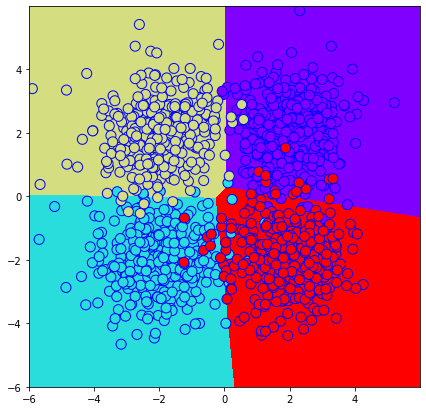

In [185]:
xx, yy = np.meshgrid(np.arange(-6, 6, .01), np.arange(-6, 6,.01))
input_field = np.c_[xx.ravel(), yy.ravel()]

result = model(torch.FloatTensor(input_field)).argmax(axis=1)

predicted = result.data.reshape(xx.shape)

# Отрисовка плоскости
plt.figure(figsize=(7, 7))
ax = plt.gca()
ax.pcolormesh(xx, yy, predicted, cmap='rainbow')

ax.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='rainbow', edgecolors='b')

## LogSoftmax + NLLLoss

$$ LogSoftMax(y_i) = log\Big(\frac{e^{y_i}}{\sum_{i=j}e^{z_j}}\Big) $$

$$NLL = -\sum_{i=1}^{n}\log(\max_{i}(p_i))$$

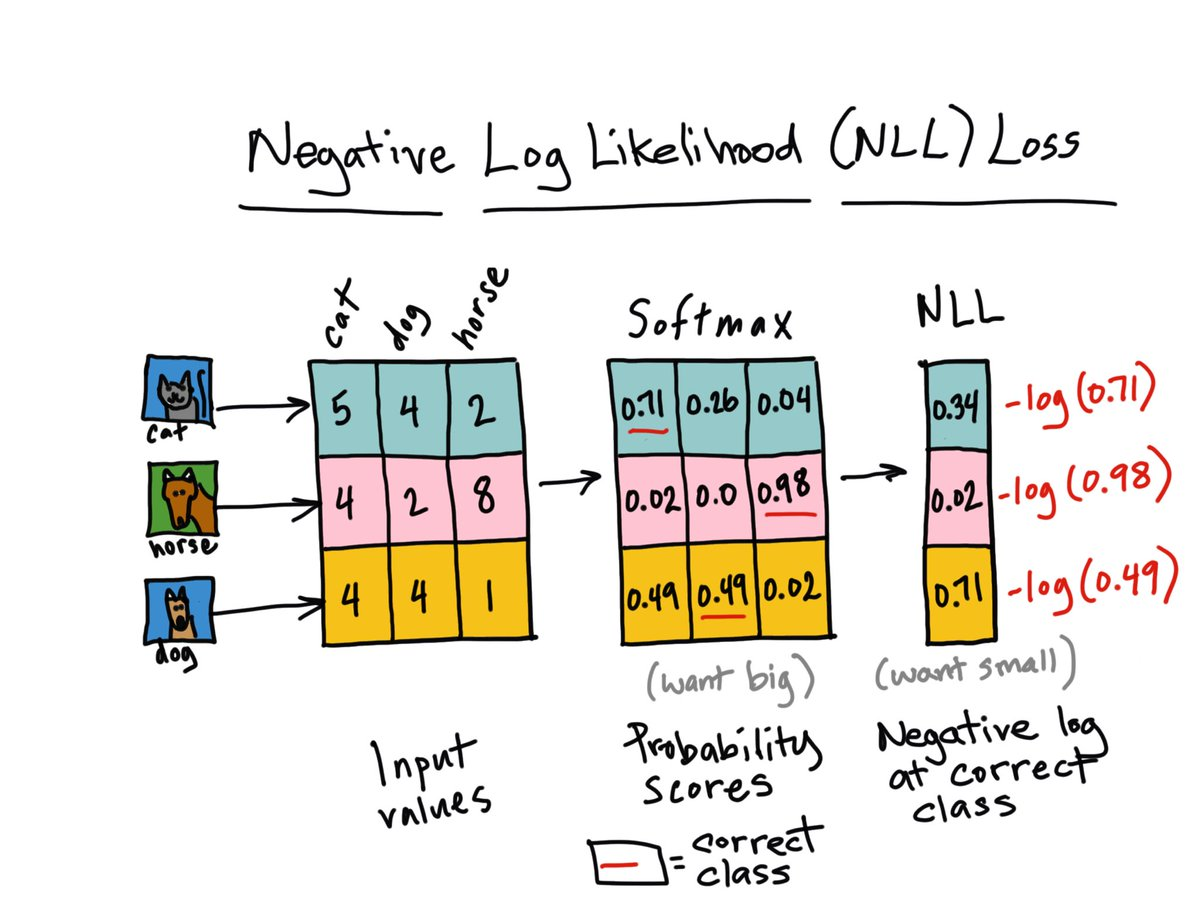

In [187]:
Image('images/nll.jpg', width=500)

In [188]:
model = Sequential(
    Linear(2, 4),
    LogSoftmax()
)

# Обозначили лосс
criterion = torch.nn.NLLLoss()

# Выбоали алгоритм оптимизации
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

# Спуск
for t in range(1000):
    # Нашли результат на текущей сети
    y_pred = model(t_X)
    # Посчитали ошибку
    loss = criterion(y_pred, t_y)
    if t % 100 == 99:
        print(t, loss.item())
    
    #Обнулили градиенты
    optimizer.zero_grad()

    # Посчитали градиенты
    loss.backward()

    # Пересчитываем веса
    optimizer.step()


    

99 0.3673408627510071
199 0.2285178154706955
299 0.1850765198469162
399 0.1642621010541916
499 0.15232351422309875
599 0.14475306868553162
699 0.13963735103607178
799 0.13602682948112488
899 0.1333979368209839
999 0.1314389854669571


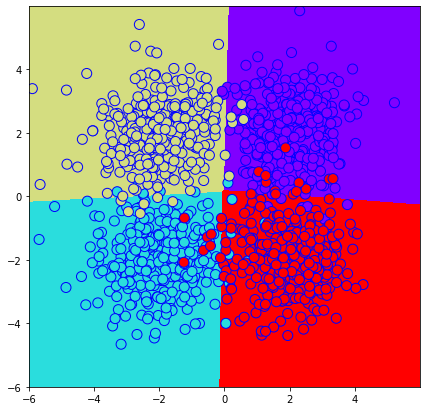

In [189]:
xx, yy = np.meshgrid(np.arange(-6, 6, .01), np.arange(-6, 6,.01))
input_field = np.c_[xx.ravel(), yy.ravel()]

result = model(torch.FloatTensor(input_field)).argmax(axis=1)

predicted = result.data.reshape(xx.shape)

# Отрисовка плоскости
plt.figure(figsize=(7, 7))
ax = plt.gca()
ax.pcolormesh(xx, yy, predicted, cmap='rainbow')

ax.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='rainbow', edgecolors='b')

# 8.3 Зачем нужны активации

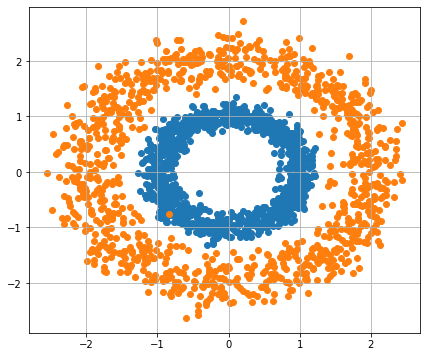

In [217]:
from random import gauss

num_samples = 1000
theta = np.linspace(0, 2*np.pi, num_samples)

r1 = 1
r2 = 2

rng = np.random.RandomState(1)

circle = np.hstack([np.cos(theta).reshape((-1, 1)) + (rng.randn(num_samples)[:,np.newaxis] / 8), 
                    np.sin(theta).reshape((-1, 1)) + (rng.randn(num_samples)[:,np.newaxis] / 8)])
lil = r1 * circle
big = r2 * circle
X = np.vstack([lil, big])
labels = np.hstack([np.zeros(num_samples), np.ones(num_samples)])

# plots
plt.figure(figsize=(7,6))
plt.scatter(lil[:,0],lil[:,1])
plt.scatter(big[:,0],big[:,1])
plt.grid()

In [218]:
t_X = torch.FloatTensor(X)
t_y = torch.LongTensor(labels) # индексы

In [225]:
model = Sequential(
    Linear(2, 4),
    ReLU(),
    Linear(4, 2)
)

# Обозначили лосс
criterion = torch.nn.CrossEntropyLoss()

# Выбоали алгоритм оптимизации
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# Спуск
for t in range(1000):
    # Нашли результат на текущей сети
    y_pred = model(t_X)
    # Посчитали ошибку
    loss = criterion(y_pred, t_y)
    if t % 100 == 99:
        print(t, loss.item())
    
    #Обнулили градиенты
    optimizer.zero_grad()

    # Посчитали градиенты
    loss.backward()

    # Пересчитываем веса
    optimizer.step()



99 0.6010008454322815
199 0.5456680655479431
299 0.5197816491127014
399 0.5008794665336609
499 0.4724845290184021
599 0.41773515939712524
699 0.33171752095222473
799 0.2513573169708252
899 0.19458025693893433
999 0.15746033191680908


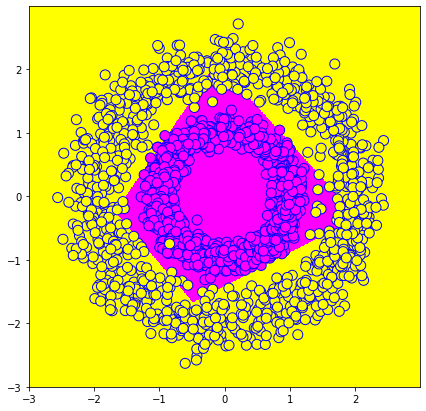

In [226]:
xx, yy = np.meshgrid(np.arange(-3, 3, .01), np.arange(-3, 3,.01))
input_field = np.c_[xx.ravel(), yy.ravel()]

result = model(torch.FloatTensor(input_field)).argmax(axis=1)

predicted = result.data.reshape(xx.shape)

# Отрисовка плоскости
plt.figure(figsize=(7, 7))
ax = plt.gca()
ax.pcolormesh(xx, yy, predicted, cmap='spring')

ax.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='spring', edgecolors='b')

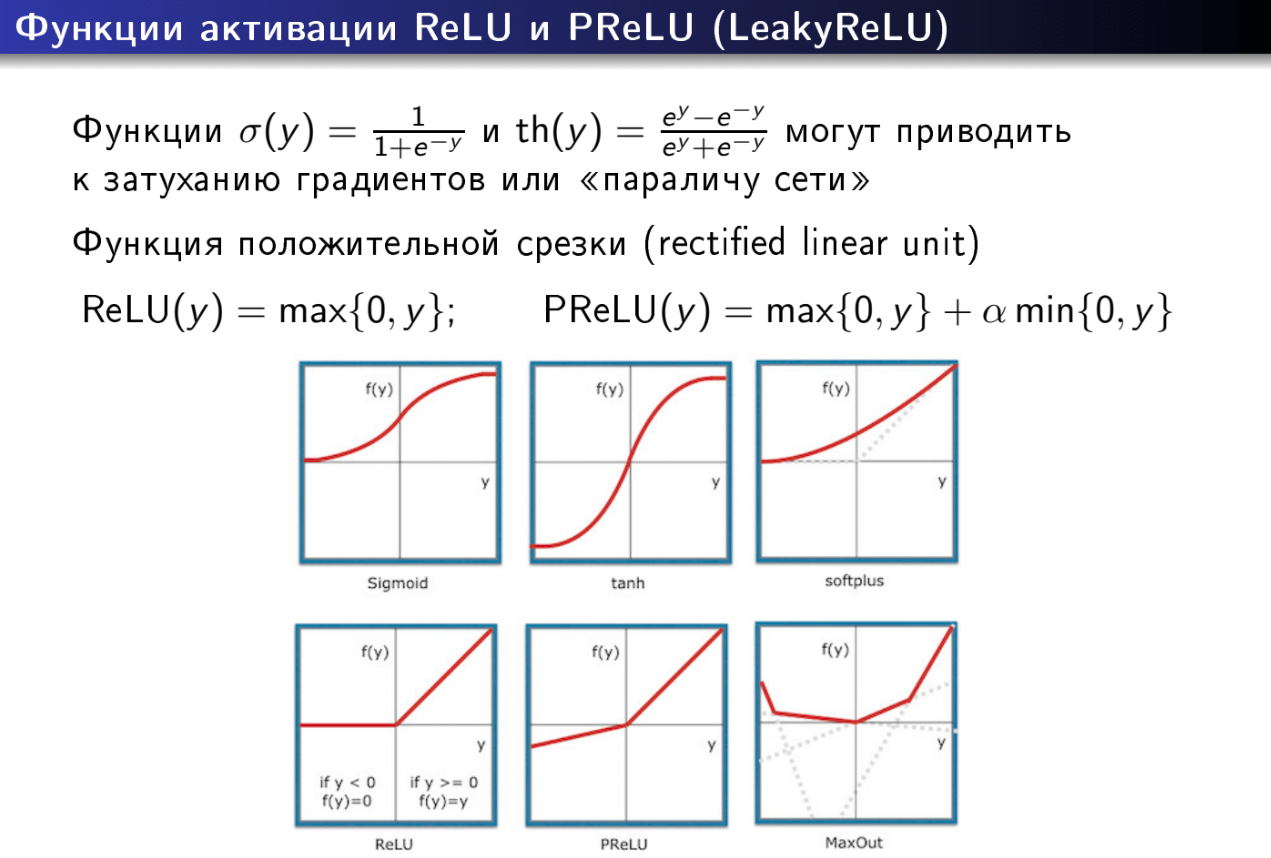

In [216]:
Image('images/activations.png', width=500)

# Ссылки
* [Softmax explanation](https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/)
* [Multiclass classification](https://towardsdatascience.com/pytorch-tabular-multiclass-classification-9f8211a123ab)